# CLaP Exmaple Visualization
In this notebook, we visualize the workflow of CLaP.

In [1]:
# fot type settings for paper plots
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd

from src.utils import load_tssb_datasets, load_has_datasets, load_datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from src.visualization import plot_state_detection
from src.clap import CLaP

sns.set_theme()
sns.set_color_codes()

import os

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Let's first load the data and select a TS.

In [3]:
df_data = load_datasets("SKAB")
df_data

,dataset,window_size,change_points,labels,time_series
0,SKAB_valve1_0,95,"[573, 974]","[0, 1, 0]","[[0.5343215742988486, 0.4100450377995824, 0.73..."
1,SKAB_valve1_1,95,"[572, 974]","[0, 1, 0]","[[0.5896695388694259, 0.12674268026910065, 0.4..."
2,SKAB_valve1_2,95,"[566, 903]","[0, 1, 0]","[[0.6172118551042802, 0.5385689097854824, 0.50..."
3,SKAB_valve1_3,95,"[573, 977]","[0, 1, 0]","[[0.6872623989512782, 0.5572555478502078, 0.76..."
4,SKAB_valve1_4,95,"[573, 922]","[0, 1, 0]","[[0.6662246810845417, 0.481474300977984, 0.368..."
5,SKAB_valve1_5,95,"[577, 980]","[0, 1, 0]","[[0.4686474501108648, 0.4265755399028284, 0.45..."
6,SKAB_valve1_6,95,"[576, 981]","[0, 1, 0]","[[0.577291745910993, 0.4163964732650742, 0.335..."
7,SKAB_valve1_7,95,"[578, 983]","[0, 1, 0]","[[0.7282672840346811, 0.4946347819422089, 0.65..."
8,SKAB_valve1_8,95,"[572, 972]","[0, 1, 0]","[[0.41991305089080305, 0.27879964358452175, 0...."
9,SKAB_valve1_9,95,"[574, 976]","[0, 1, 0]","[[0.46307399064286936, 0.5789224165545515, 0.3..."


In [4]:
idx = 12 # 11 12 15
data_row = df_data.iloc[idx]

Now, we plot how the TS is transformed by CLaP.

In [5]:
np.random.seed(2357)

time_series = data_row.time_series[:,7]

# sub-select TS
time_series = time_series[200:] # [:data_row.change_points[2]]
change_points = data_row.change_points - 200 # [:2]
labels = data_row.labels # [:2]
window_size = 20

# create CLaP
clap = CLaP()
clap.window_size = window_size

X, y = clap._create_dataset(time_series.reshape(-1,1), change_points, np.arange(labels.shape[0]))
y_true, y_pred = clap._cross_val_classifier(X, y)
score = f1_score(y_true, y_pred, average="macro")
gain = clap._classification_gain(y_true, y_pred)

y_true_merged, y_pred_merged = y_true.copy(), y_pred.copy()
y_true_merged[y_true == 2] = 0
y_pred_merged[y_pred == 2] = 0

score_merged = f1_score(y_true_merged, y_pred_merged, average="macro")
gain_merged = clap._classification_gain(y_true_merged, y_pred_merged)

<Figure size 640x480 with 0 Axes>

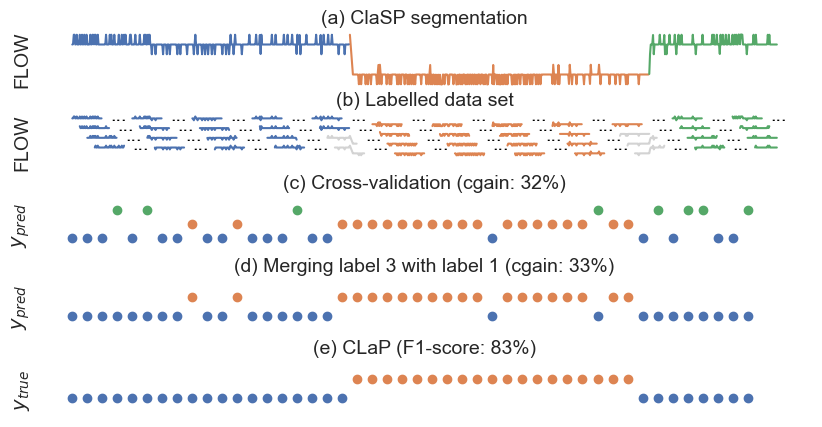

In [6]:
plt.clf()

font_size = 14
n_windows = int(time_series.shape[0] / (2*window_size))

fig, axes = plt.subplots(
    5, 
    sharex=True, 
    gridspec_kw={'hspace': .5}, 
    figsize=(10, 5)
)

### plots TS ###
segments = [0] + change_points.tolist() + [time_series.shape[0]]
    
for idx in np.arange(0, len(segments) - 1):
    axes[0].plot(
        np.arange(segments[idx], segments[idx + 1]),
        time_series[segments[idx]:segments[idx + 1]],
        c=f"C{idx}"
    )
    
axes[0].set_ylabel("FLOW", fontsize=font_size)

### plots windows ###
for idx in np.arange(0, time_series.shape[0], 4*window_size):
    x1, x2, = idx, min(idx+2*window_size, time_series.shape[0])
    
    for idxoff, x_offset in enumerate(np.arange(0, 2, .5)):        
        x_offset = int(x_offset * window_size)
        x3, x4 = x1+x_offset, min(x2+x_offset, time_series.shape[0])
        subsequence = time_series[x3:x4]
        y_offset = time_series.max() - time_series.min()

        excluded = True
        
        for seg_idx in range(len(segments)-1):
            start_idx, end_idx = segments[seg_idx], segments[seg_idx+1]

            if x3 >= start_idx and x4 <= end_idx:
                axes[1].plot(np.arange(x3, x4), subsequence - y_offset * idxoff, c=f"C{seg_idx}")
                excluded = False
                break

        if excluded is True:
            axes[1].plot(np.arange(x3, x4), subsequence - y_offset * idxoff, c="lightgrey")
        
        if x3 + int(2.5*window_size) < time_series.shape[0]:
            axes[1].text(x3 + int(2.5*window_size), time_series.mean() - y_offset * idxoff, "...", fontsize=font_size, c="black")

axes[1].set_yticks(np.arange(time_series.mean() - y_offset * (idxoff+2), time_series.max(), 10))
axes[1].set_ylabel("FLOW", fontsize=font_size)

### plot cross-validation ###
for kdx, label in enumerate(y_pred):
    if kdx % 2 == 0:
        axes[2].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")
    
axes[2].set_yticks(np.arange(-1, 3, .1))
axes[2].set_ylabel("$y_{pred}$", fontsize=font_size)

### plot merge ###
for kdx, label in enumerate(y_pred_merged):
    if kdx % 2 == 0:
        axes[3].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")
    
axes[3].set_yticks(np.arange(-1, 2, .1))
axes[3].set_ylabel("$y_{pred}$", fontsize=font_size)

### plot CLaP ###
for kdx, label in enumerate(y_true_merged):
    if kdx % 2 == 0:
        axes[4].scatter(kdx * clap.window_size // 2, label, c=f"C{label}")
    
axes[4].set_yticks(np.arange(-1, 2, .1))
axes[4].set_ylabel("$y_{true}$", fontsize=font_size)

ax_titles = [
    "(a) ClaSP segmentation",
    "(b) Labelled data set",
    f"(c) Cross-validation (cgain: {int(gain * 100)}%)",
    f"(d) Merging label 3 with label 1 (cgain: {int(gain_merged * 100)}%)",
    f"(e) CLaP (F1-score: {int(score_merged * 100)}%)"
]

# adjust axes style
for idx, ax in enumerate(axes):
    ax.set_title(ax_titles[idx], fontsize=font_size)
    ax.set_facecolor((1., 1., 1.))
    
    ax.tick_params(
        axis='both',          
        which='both',      
        labelbottom=False,
        labelleft=False
    )
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)
        
plt.savefig("../../figures/clap_workflow.pdf", bbox_inches="tight")